following this article:
https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import stats
import matplotlib.image as mpimg

In [2]:
images_rgb = np.load("mini_data/images_rgb.npy")

In [3]:
images_gray = np.load("mini_data/images_gray.npy")

In [4]:
images_sums = np.load("mini_data/images_rgbsum.npy")

In [5]:
images_rgb.shape

(229, 256, 256, 3)

In [29]:
#splitting up the data into blues, greens and reds. 
blues = images_rgb[:,:,:,2]
greens = images_rgb[:,:,:,1]
reds = images_rgb[:,:,:,0]


In [30]:
blues = blues/255
greens = greens/255
reds = reds/255

In [31]:
length = len(images_rgb)

In [32]:
#conducting pca on the blue, green, red data separately
pcaB = []
pcaG = []
pcaR = []

transformed_blue = []
transformed_green = []
transformed_red = []

for i in range(length):
    pcaB.append(PCA(n_components=100))
    pcaG.append(PCA(n_components=100))
    pcaR.append(PCA(n_components=100))


for i in range(length):
    pcaB[i].fit(blues[i])
    transformed_blue.append(pcaB[i].transform(blues[i]))
    
    pcaG[i].fit(greens[i])
    transformed_green.append(pcaG[i].transform(greens[i]))

    pcaR[i].fit(reds[i])
    transformed_red.append(pcaR[i].transform(reds[i]))


   

In [33]:
print(sum(pcaB[0].explained_variance_ratio_))

0.9867200914023274


In [34]:
#reconstructing the images

reconBlues = []
reconGreens = []
reconReds = []

for i in range(length):
    reconBlues.append(pcaB[i].inverse_transform(transformed_blue[i]))
    reconGreens.append(pcaG[i].inverse_transform(transformed_green[i]))
    reconReds.append(pcaR[i].inverse_transform(transformed_red[i]))

In [35]:
import cv2

In [36]:
img_reduced = (cv2.merge((reconReds[21], reconGreens[21], reconBlues[21])))

In [37]:
img_original = images_rgb[21]

In [40]:
img_reduced = cv2.bitwise_not(img_reduced)

In [38]:
img_reduced.shape

(256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


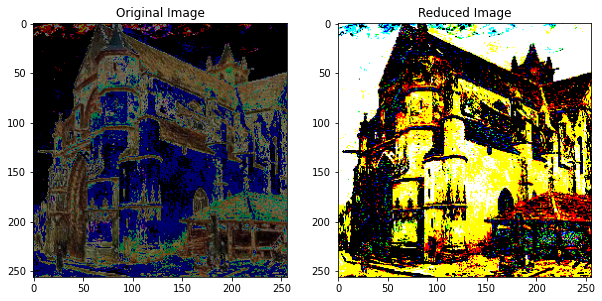

In [41]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img_original)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()